### Fruit Image Classification
Data source: https://www.kaggle.com/moltean/fruits

In [140]:
import os
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras
import h5py

In [141]:
from sklearn.datasets import load_files

In [142]:
def load_dataset(path):
    data=load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files, targets, target_labels

**Loading and Splitting data into training and test data**

In [143]:
# Have used minisets; each with 20 different categories of fruits
X_train, y_train, target_labels = load_dataset('fruits-360/Training_miniset')
X_test, y_test, _ = load_dataset('fruits-360/Test_miniset')

In [144]:
X_train.shape

(9951,)

In [145]:
X_test.shape

(3332,)

In [146]:
n_class=len(np.unique(y_train))
print('number of categories: ', n_class)

number of categories:  20


### **Modelling**

In [147]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train, n_class)
y_test=to_categorical(y_test, n_class)

In [148]:
# support for opening, manipulating, and saving many different image file formats
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [149]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
def convert_image_to_array(files):
    images_as_array=[]
    for file in files:
        images_as_array.append(img_to_array(load_img(file)))
    return images_as_array

In [150]:
# data reshaping
X_train = np.array(convert_image_to_array(X_train))
X_test = np.array(convert_image_to_array(X_test))

In [151]:
# normalizing(scaling down) the pixel values before feeding into a neural network
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [161]:
from tensorflow.keras.models import Sequential, Model #the model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input #fully connected layers
from tensorflow.keras.layers import Convolution2D, MaxPooling2D #the convnet
from tensorflow.keras.callbacks import ModelCheckpoint

# Building the CNN Model
nb_classes = n_class
img_rows =100
img_cols=100
img_channels = 3

model_input=Input(shape=(img_rows, img_cols,img_channels))

x = Convolution2D(32, 3, 3, padding='same')(model_input)
x = Activation('relu')(x)
x = Convolution2D(32, 3, 3)(x)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

conv_out = Flatten()(x)
x1 = Dense(nb_classes, activation='softmax')(conv_out)
lst = [x1]

model = Model(inputs=model_input, outputs=lst) 

# Configuration of the learning process
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# model training
model.fit(X_train, y_train, batch_size=158, epochs=3, verbose=0)

**Predictions**

In [162]:
y_pred = model.predict(X_test) # model prediction

**Model Evaluation**

In [163]:
score=model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print("\nThe model is ", round(score[1]*100,2),"% accurate.")

Test accuracy: 0.9186674952507019

The model is  91.87 % accurate.


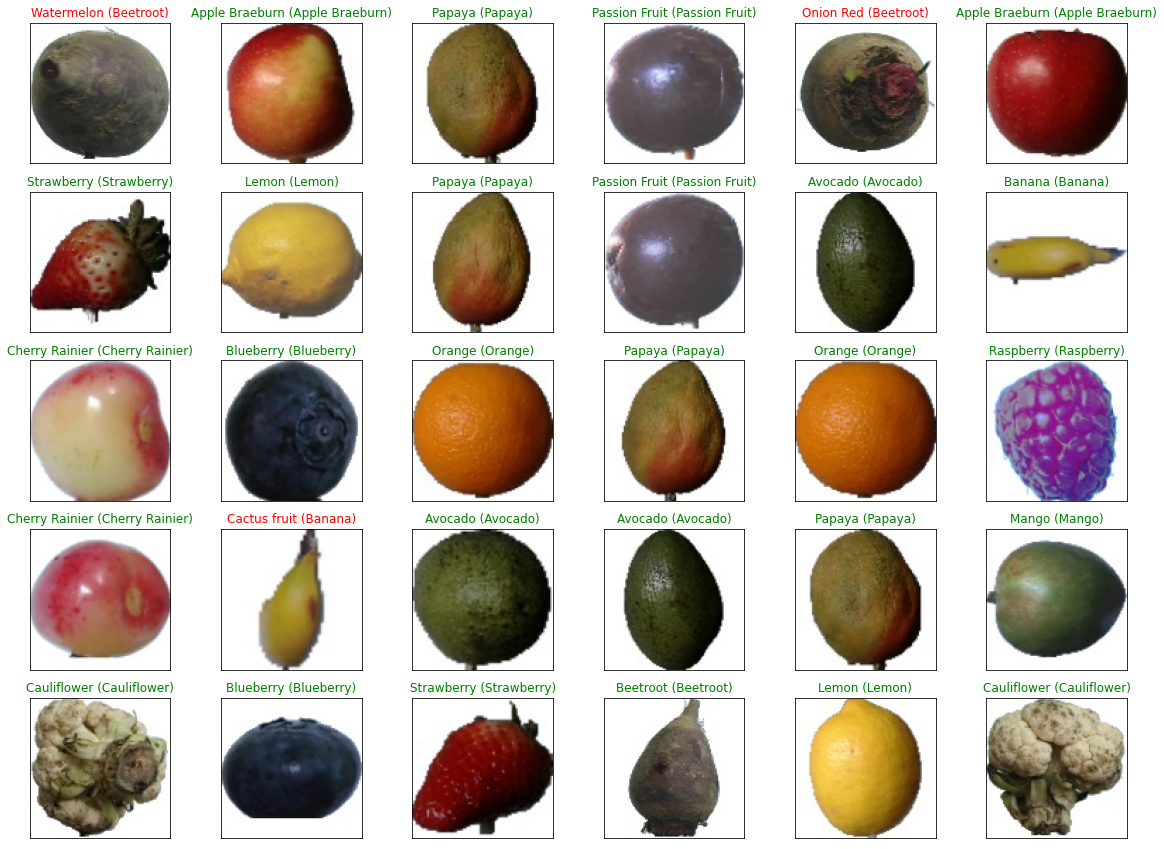

In [164]:
#plotting a random sample of test images, their predicted labels, and ground truth
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=30, replace=False)):
    ax = fig.add_subplot(5, 6, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(target_labels[pred_idx], target_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))